In [ ]:
from main import SimCatVal
afw_img, cat, match, area = SimCatVal('/hildafs/home/pladuca/main/skyCatalog.yaml',250, 'i', 50, 0.7, 0.1, 30, True)

2025-11-11 15:26:15,693 - INFO - Catalog data will be read from /hildafs/home/pladuca/main/roman_rubin_cats_v1.1.2_faint/roman_rubin_cats_v1.1.2_faint/


Generating Sims


2025-11-11 15:26:21,732 - INFO - Working on healpix pixel 10307
2025-11-11 15:26:27,587 - INFO - Working on healpix pixel 10307


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/394 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Running Pipeline


  0%|          | 0/1 [00:00<?, ?it/s]

      coord_ra     
        rad        
-------------------
0.17746664097977727
0.17731530992304684
0.17721380139795365
0.17734302381030384
 0.1772677732797075
0.17736911189699747
0.17730488255817586
0.17739045730707362
 0.1774605041327989
                ...
 0.1773436772955104
 0.1773802855638539
 0.1772494619482246
0.17736689002247452
0.17746539597217653
0.17729586718725346
0.17727225469675062
 0.1774180673462682
0.17748661337559485
0.17738785519986208
Length = 35 rows


In [9]:
print(len(cat))
print(len(match[0]))

35
31


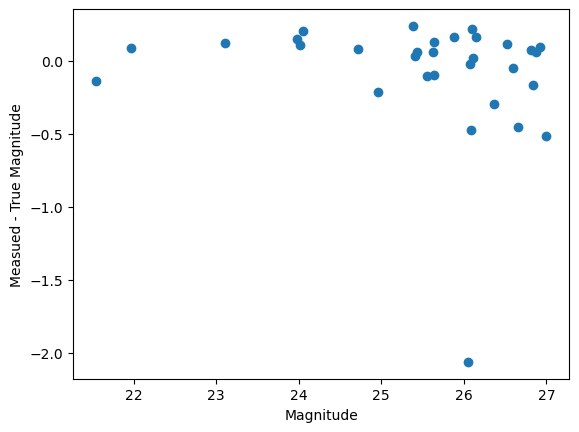

In [4]:
import matplotlib.pyplot as plt
import numpy as np
def compare_matches(matches, coadd_zp):
    mag = matches['mag']
    mag_t = -2.5*np.log10(matches['flux']) + coadd_zp
    dif = mag - mag_t
    plt.scatter(mag, dif)
    plt.xlabel('Magnitude')
    plt.ylabel('Measued - True Magnitude')
    plt.show()
compare_matches(match[0], 30)


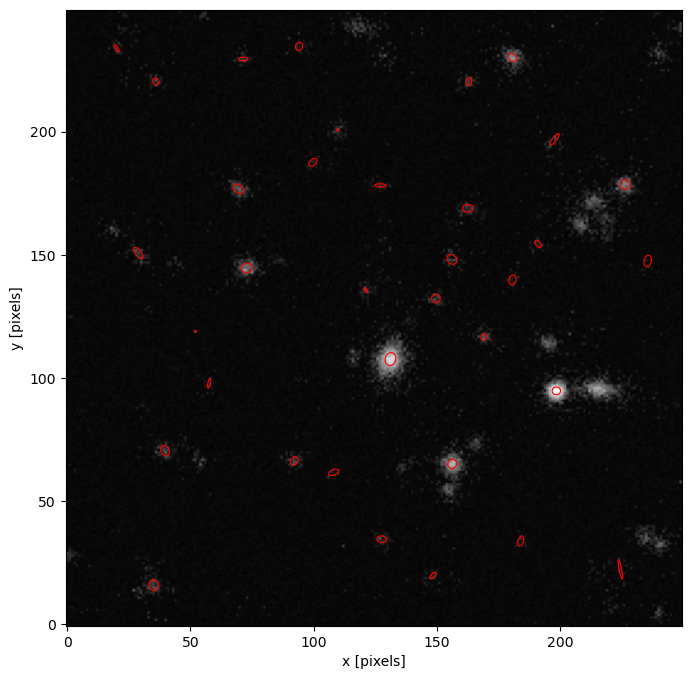

In [13]:
from matplotlib.patches import Ellipse
from astropy.visualization import MinMaxInterval, SqrtStretch, ImageNormalize, AsinhStretch
from lsst.geom import SpherePoint, degrees

def plot_sim_image(afw_img, cat=None):
    img = afw_img.image.array
    wcs = afw_img.wcs
    norm = ImageNormalize(img, interval=MinMaxInterval(), stretch=AsinhStretch(0.03))
    fig, ax = plt.subplots(figsize=(8,8))
    ax.imshow(img, origin='lower', cmap='gray', norm=norm) #apply a sinh stretch?
    if cat != None:
        for i in range(len(cat)):
            # sp = SpherePoint(cat['coord_ra'] * degrees, cat['coord_dec'] * degrees)
            # point = wcs.skyToPixel(sp)
            # x=point.getX()
            # y=point.getY()
            x = cat['base_SdssCentroid_x'][i]
            y = cat['base_SdssCentroid_y'][i]
            xx = cat['base_SdssShape_xx'][i]
            yy = cat['base_SdssShape_yy'][i]
            xy = cat['base_SdssShape_xy'][i]

            T = 0.5 * (xx + yy)
            D = np.sqrt(((xx - yy) / 2)**2 + xy**2)
            a = np.sqrt(T + D)
            b = np.sqrt(T - D)
            theta = 0.5 * np.arctan2(2 * xy, xx - yy)
            
            e = Ellipse((x, y), width=2*a, height=2*b,
                        angle=np.degrees(theta), edgecolor='red',
                        facecolor='none', lw=0.8)
            ax.add_patch(e)
    ax.set_xlabel('x [pixels]')
    ax.set_ylabel('y [pixels]')
    plt.show()

plot_sim_image(afw_img[0], cat)